# model_data.csv is a dataset climatological attributes, drought severity index, land cover and the vegetative indices from various satellite data sources at 4,536 large wildfire locations in the US over the last 10 years. model_data.csv is stored as a dataframe.

import pandas as pd 
    
df0 = pd.read_csv("/content/drive/MyDrive/model_data.csv") 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df0.columns

Index(['Unnamed: 0', 'ACRES', 'LATITUDE', 'LONGITUDE', 'DOY', 'ppt', 'tmean',
       'vpdmax', 'vpdmin', 'PDSI', 'Developed', 'Forests', 'Shrub', 'grass',
       'Pasture', 'Wetlands', 'NDVI', 'EVI', 'Elevation', 'US_L4CODE'],
      dtype='object')

In [ ]:
X = df0.iloc[:, 1:]

In [ ]:
X.columns

Index(['ACRES', 'LATITUDE', 'LONGITUDE', 'DOY', 'ppt', 'tmean', 'vpdmax',
       'vpdmin', 'PDSI', 'Developed', 'Forests', 'Shrub', 'grass', 'Pasture',
       'Wetlands', 'NDVI', 'EVI', 'Elevation', 'US_L4CODE'],
      dtype='object')

In [ ]:
X = X.drop(['US_L4CODE'], axis=1)

In [ ]:
Y = X['ACRES']

In [ ]:
X = X.drop(['ACRES'], axis=1)

## X contains the following features:

In [ ]:
X.columns

Index(['LATITUDE', 'LONGITUDE', 'DOY', 'ppt', 'tmean', 'vpdmax', 'vpdmin',
       'PDSI', 'Developed', 'Forests', 'Shrub', 'grass', 'Pasture', 'Wetlands',
       'NDVI', 'EVI', 'Elevation'],
      dtype='object')

In [ ]:
X

,LATITUDE,LONGITUDE,DOY,ppt,tmean,vpdmax,vpdmin,PDSI,Developed,Forests,Shrub,grass,Pasture,Wetlands,NDVI,EVI,Elevation
0,33.752,-85.627,31,115.185997,7.973001,7.763000,0.418,-3.26,1.579683,87.998352,2.668625,1.294910,2.681162,0.139700,0.5616,0.2149,420
1,30.356,-84.599,43,105.496002,14.052001,9.916000,0.402,-4.89,2.426837,42.436508,0.574919,0.197013,0.007164,54.298456,0.6508,0.3178,38
2,28.546,-81.795,48,22.358999,18.474001,15.286000,0.718,-4.02,24.631398,1.236138,0.537451,0.419212,13.318046,25.720633,0.4525,0.2151,30
3,37.145,-113.280,143,0.000000,21.591002,37.395000,12.896,-2.41,8.685917,0.965500,67.542006,13.930785,0.709347,0.257944,0.1900,0.1215,1237
4,38.776,-119.478,143,7.539700,9.605000,15.868000,2.795,-3.06,0.757644,1.617381,56.151600,41.045297,0.000000,0.012538,0.3583,0.2244,2248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,40.984,-122.279,221,0.000000,23.591002,37.069000,9.143,-4.27,0.059088,84.433025,14.564272,0.936454,0.000000,0.000000,0.7237,0.4020,1013
4532,40.998,-121.489,221,0.000000,21.217001,38.066002,5.667,0.90,4.609681,28.304590,53.444725,4.740414,4.455667,0.639338,0.5270,0.2515,1242
4533,47.360,-104.755,221,35.879002,19.893002,31.091000,2.435,2.28,0.535545,0.383300,5.290967,62.262901,1.588723,0.872275,0.3400,0.2010,835
4534,46.032,-116.912,221,12.870000,22.605001,40.036999,7.038,1.86,0.091332,1.796203,1.375358,94.527221,0.000000,0.007163,0.2301,0.0995,643


## X is scaled using standard scaler.
## The standard score of a sample x is calculated as:

## z = (x - u) / s

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## X contains 4536 data points and 17 features.

In [ ]:
X.shape

(4536, 17)

In [ ]:
Y.shape

(4536,)

## The dataset (X and Y) is split into train and test sets in the ratio 80:20.

In [ ]:
from sklearn.model_selection import train_test_split

import random

random.seed(8)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
x_train.shape

(3628, 17)

In [ ]:
y_train.shape

(3628,)

In [ ]:
x_test.shape

(908, 17)

In [ ]:
y_test.shape

(908,)

In [ ]:
# DNN

## A 5-layered Deep Neural Network is trained on the above-mentioned dataset.
## There are 512, 256, 64, 16 and 1 neuron(s) respectively in the five layers.
## reLU activation function is used for all the layers.
## RMS prop is the oprimizer with learning rate equal to 0.001.
## Mean squared error is the loss function and mean absolute error is the performance metric.
## Callbacks depens on validation loss.
## The network is trained for 200 epochs with batch size equal to 32 and validation split equal to 0.2.

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Neural network
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss = tf.keras.losses.mean_squared_error, optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['mean_absolute_error'])
callbacks = [keras.callbacks.ModelCheckpoint(filepath="HI.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/200
91/91 [==============================] - 2s 13ms/step - loss: 4.1992 - mean_absolute_error: 1.4628 - val_loss: 1.8403 - val_mean_absolute_error: 1.0672
Epoch 2/200
91/91 [==============================] - 1s 12ms/step - loss: 2.1494 - mean_absolute_error: 1.1506 - val_loss: 2.0364 - val_mean_absolute_error: 1.0821
Epoch 3/200
91/91 [==============================] - 1s 12ms/step - loss: 1.8119 - mean_absolute_error: 1.0479 - val_loss: 2.6551 - val_mean_absolute_error: 1.2748
Epoch 4/200
91/91 [==============================] - 1s 12ms/step - loss: 1.7045 - mean_absolute_error: 1.0192 - val_loss: 2.2819 - val_mean_absolute_error: 1.1712
Epoch 5/200
91/91 [==============================] - 1s 11ms/step - loss: 1.5427 - mean_absolute_error: 0.9659 - val_loss: 1.5842 - val_mean_absolute_error: 1.0123
Epoch 6/200
91/91 [==============================] - 1s 8ms/step - loss: 1.4954 - mean_absolute_error: 0.9513 - val_loss: 1.4171 - val_mean_absolute_error: 0.9315
Epoch 7/200
91/91

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 158,049
Trainable params: 158,049
Non-trainable params: 0
_________________________________________________________________


## Plots for training accuracy, validation accuracy, training loss and validation loss.

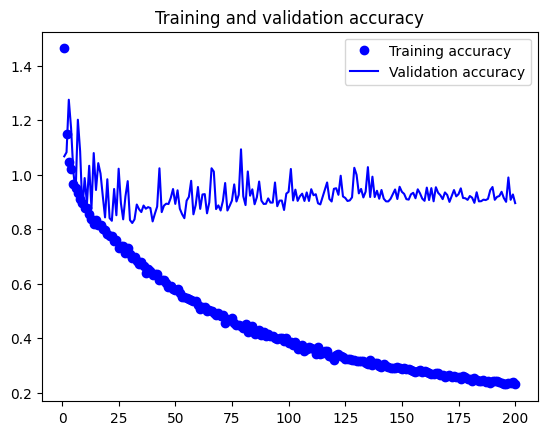

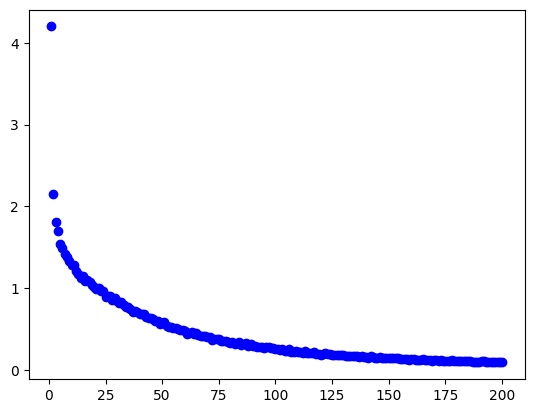

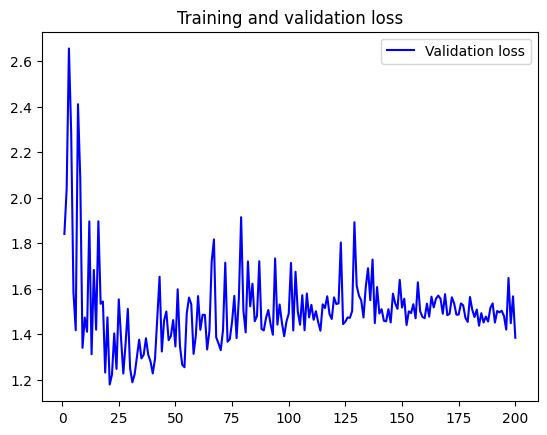

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["mean_absolute_error"]
val_accuracy = history.history["val_mean_absolute_error"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.figure()
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
x_test.shape

(908, 17)

In [ ]:
y_test.shape

(908,)

In [ ]:
test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
test_mae = model.evaluate(x_test, y_test, verbose=0)[1]

## Mean absolute error divided by the mean value of the test set is 11 percent.

In [ ]:
import numpy as np

test_mae/np.mean(np.abs(y_test))

0.11346268481077072

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(x_test))

29/29 [==============================] - 0s 3ms/step


0.006752781191291857

29/29 [==============================] - 0s 3ms/step


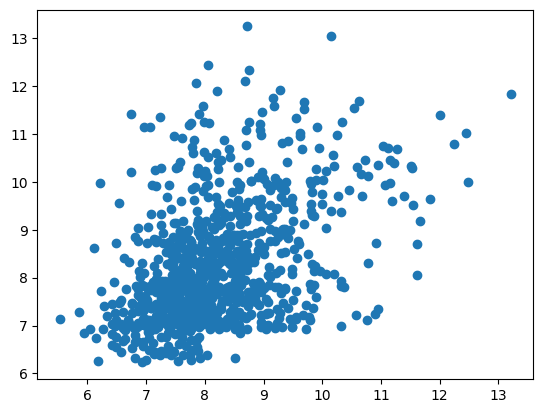

In [ ]:
plt.scatter(model.predict(x_test),y_test)

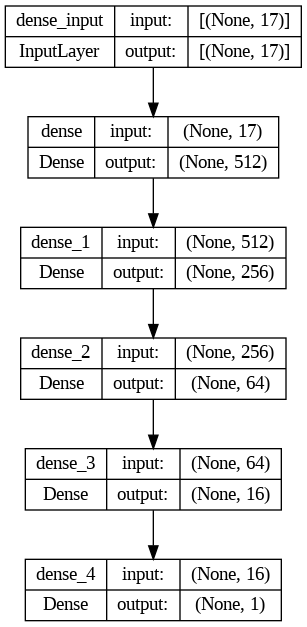

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

## A SHAP analysis is conducted to visualize feature importance and partial dependence. The model revealed the highest importance of land cover around the vicinity of wildfire occurrence for prediction of total wildfire burn area. 

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.9 MB/s eta 0:00:00


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
array([[-0.83717518,  1.74532218, -2.24021734, ...,  0.79692656,
         0.048305  , -0.91989498],
       [-1.42993525,  1.82950976, -2.06468727, ...,  1.26307796,
         1.09871219, -1.42724733],
       [-1.74586449,  2.05914201, -1.99154974, ...,  0.22677949,
         0.05034661, -1.43787251],
       ...,
       [ 1.53805421,  0.17884369,  0.53900875, ..., -0.36113568,
        -0.09358674, -0.36871377],
       [ 1.3062564 , -0.81674806,  0.53900875, ..., -0.93546347,
        -1.12970268, -0.62371809],
       [ 1.20816124, -0.95269298,  0.55363626, ..., -0.71388478,
        -0.64992485, -0.26113383]])>]. Consider rewriting this model with the Functional API.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update 

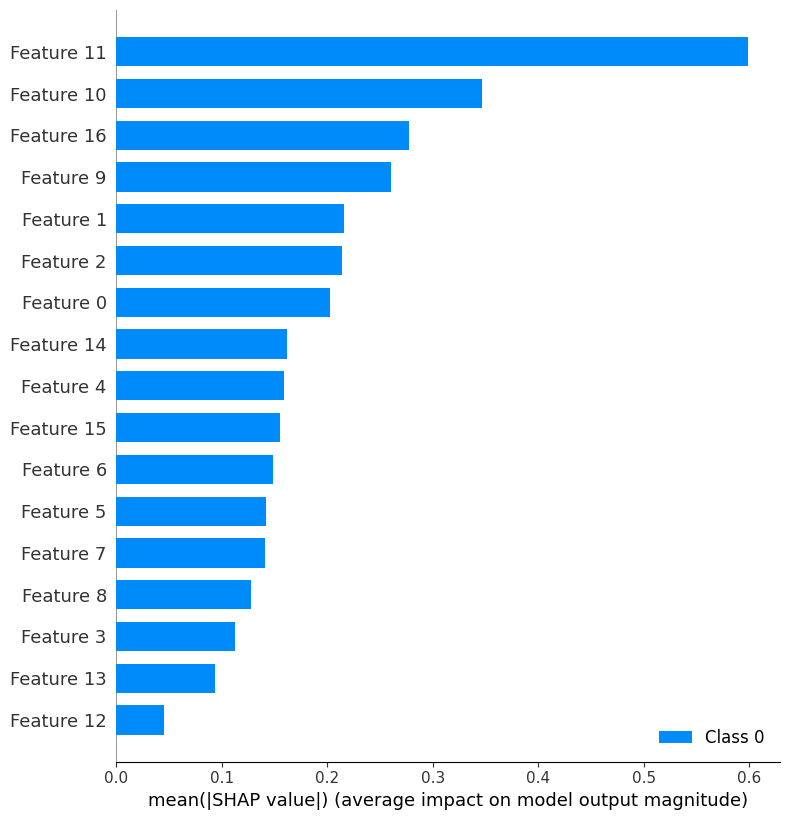

In [ ]:
import shap
# Create a SHAP explainer for your model
explainer = shap.DeepExplainer(model, X)

# Calculate SHAP values for your data
shap_values = explainer.shap_values(X)

# Plot feature importances using a summary plot
shap.summary_plot(shap_values, X)

In [ ]:
shap_out  = pd.DataFrame(shap_values[0])

In [ ]:
shap_out.to_csv('/content/shap_value_matrix.csv')

In [ ]:
shap_out  = abs(shap_out)

In [ ]:
importance = shap_out.mean()
importance

0     0.202912
1     0.215772
2     0.213437
3     0.112537
4     0.159022
5     0.141655
6     0.148278
7     0.140592
8     0.127473
9     0.260682
10    0.346839
11    0.599145
12    0.044936
13    0.092963
14    0.161702
15    0.155411
16    0.277184
dtype: float64

In [ ]:
import pandas as pd

X_df = pd.DataFrame(X, columns=['LATITUDE', 'LONGITUDE', 'DOY', 'ppt', 'tmean', 'vpdmax',
       'vpdmin', 'PDSI', 'Developed', 'Forests', 'Shrub', 'grass', 'Pasture',
       'Wetlands', 'NDVI', 'EVI', 'Elevation'])

In [ ]:
corr_matrix = X_df.corr()

In [ ]:
print(corr_matrix)

           LATITUDE  LONGITUDE       DOY       ppt     tmean    vpdmax  \
LATITUDE   1.000000  -0.592948  0.367989 -0.332501 -0.157187  0.046373   
LONGITUDE -0.592948   1.000000 -0.409780  0.524378 -0.173731 -0.405435   
DOY        0.367989  -0.409780  1.000000 -0.150563  0.290877  0.291466   
ppt       -0.332501   0.524378 -0.150563  1.000000 -0.032387 -0.341215   
tmean     -0.157187  -0.173731  0.290877 -0.032387  1.000000  0.835325   
vpdmax     0.046373  -0.405435  0.291466 -0.341215  0.835325  1.000000   
vpdmin     0.103044  -0.517440  0.280185 -0.379519  0.584593  0.744035   
PDSI       0.146927  -0.113054  0.027618  0.005601 -0.091870 -0.090758   
Developed -0.208291   0.189250 -0.083932  0.088050 -0.040439 -0.133413   
Forests    0.017870   0.137331  0.026512  0.175059 -0.295859 -0.374741   
Shrub     -0.030464  -0.313605  0.126325 -0.261306  0.268251  0.434165   
grass      0.305394  -0.300573  0.041666 -0.261248  0.040689  0.232051   
Pasture   -0.197637   0.314582 -0.1683

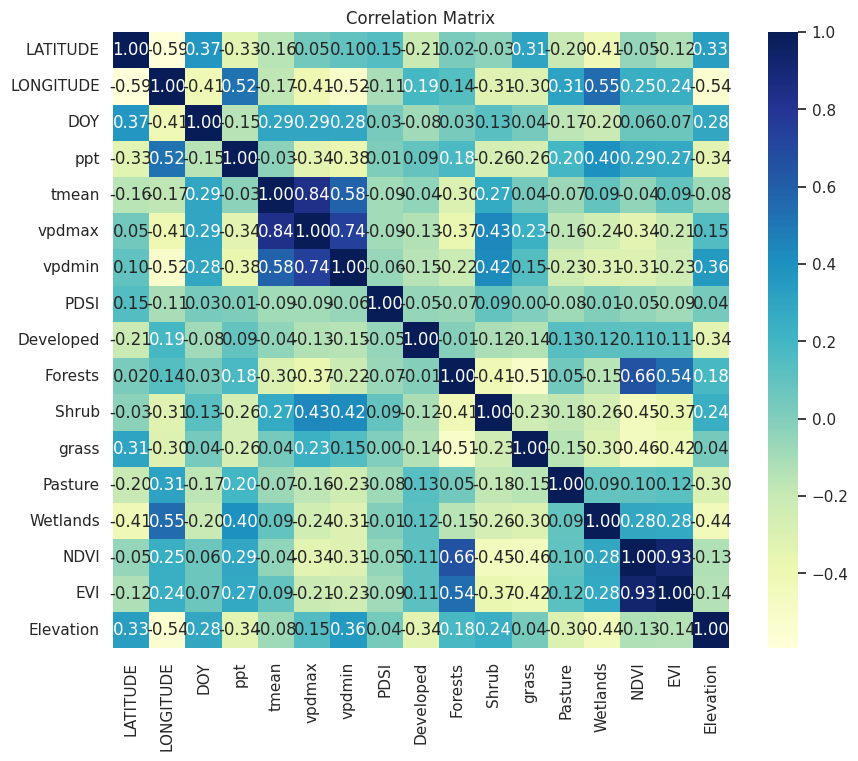

In [ ]:
import seaborn as sns

sns.set(style="white")
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", square=True)
plt.show()